In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.model_selection import cross_val_score
dta =sm.datasets.fair.load_pandas().data

In [2]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [3]:
## Let's Convert the affair column into an binary column i.e the woman having a affair or not 

In [4]:
dta['affairs'] = (dta.affairs >0).astype(int)

In [5]:
dta

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0


In [6]:
## Exploratory DATA Analysis

In [16]:
dta.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
dtype: int64

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


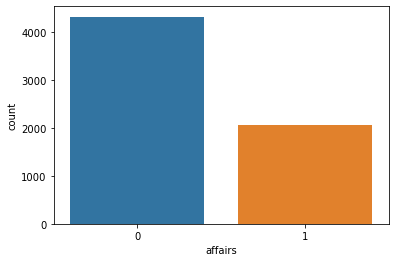

In [10]:
sns.countplot(dta["affairs"])

In [11]:
dta["affairs"].value_counts()

0    4313
1    2053
Name: affairs, dtype: int64

In [8]:
import seaborn as sns

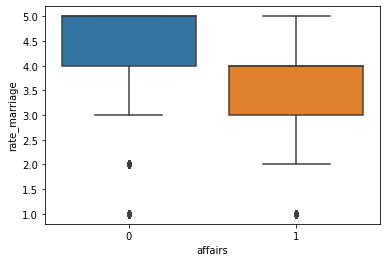

In [9]:
sns.boxplot(x="affairs",y="rate_marriage",data=dta)

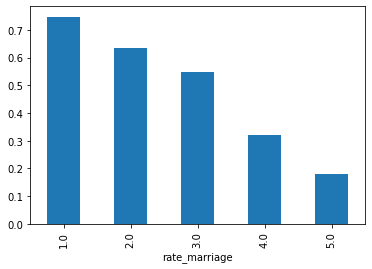

In [55]:
dta.groupby("rate_marriage")["affairs"].mean().plot(kind="bar")

In [12]:
## It is obvious that people having affairs have a quiet low rating towards marriage

In [13]:
dta.groupby("affairs")["rate_marriage"].describe()

,count,mean,std,min,25%,50%,75%,max
affairs,,,,,,,,
0,4313.0,4.329701,0.821099,1.0,4.0,5.0,5.0,5.0
1,2053.0,3.647345,1.065286,1.0,3.0,4.0,4.0,5.0


In [14]:
# Let's Find Out the women that are having affair but still rated marriage as 5

In [64]:
dta[(dta["affairs"]==1) &(dta["rate_marriage"]==5)]

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1
6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,1
7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,3.0,1
11,5.0,27.0,6.0,2.0,3.0,14.0,3.0,5.0,1
13,5.0,27.0,6.0,0.0,2.0,14.0,3.0,2.0,1
...,...,...,...,...,...,...,...,...,...
2038,5.0,32.0,13.0,1.0,3.0,14.0,5.0,2.0,1
2043,5.0,32.0,16.5,2.0,3.0,14.0,4.0,5.0,1
2044,5.0,32.0,13.0,3.0,3.0,14.0,3.0,6.0,1
2047,5.0,22.0,2.5,0.0,3.0,14.0,3.0,2.0,1


In [66]:
## these values are potential Outliers

In [68]:
dta.loc[(dta["affairs"]==1) &(dta["rate_marriage"]==5),"rate_marriage"]=dta[dta['affairs']==1]["rate_marriage"].mode()[0]

**Quiet Absurd**

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


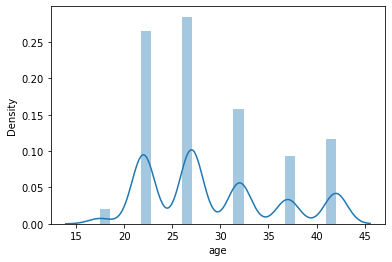

In [17]:
sns.distplot(dta["age"])

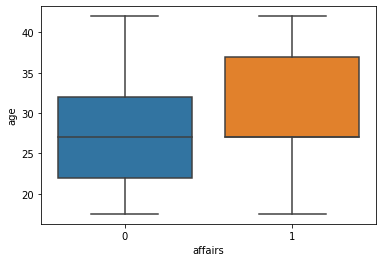

In [18]:
sns.boxplot(x="affairs",y="age",data=dta)

In [19]:
dta.groupby("affairs")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
affairs,,,,,,,,
0,4313.0,28.390679,6.809684,17.5,22.0,27.0,32.0,42.0
1,2053.0,30.537019,6.699997,17.5,27.0,27.0,37.0,42.0


In [20]:
## It can be seen that The women of higher age are likely to have an affair

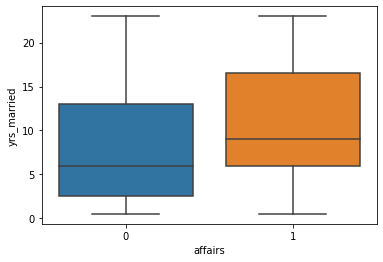

In [22]:
sns.boxplot(x="affairs",y="yrs_married",data=dta)

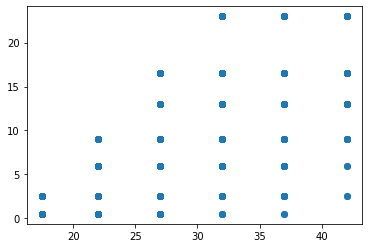

In [24]:
plt.scatter(x=dta["age"],y=dta["yrs_married"])

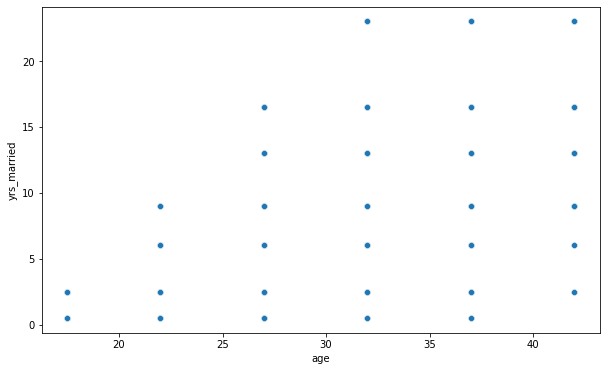

In [32]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="age",y="yrs_married",data=dta)

In [33]:
dta.groupby("affairs")["yrs_married"].describe()

,count,mean,std,min,25%,50%,75%,max
affairs,,,,,,,,
0,4313.0,7.989335,7.101994,0.5,2.5,6.0,13.0,23.0
1,2053.0,11.152460,7.185216,0.5,6.0,9.0,16.5,23.0


In [35]:
## Let's see the womens who got married recently still having an affair

In [39]:
dta[(dta["affairs"]==1) & (dta["yrs_married"]<=1)].index

Int64Index([  36,  110,  322,  337,  505,  975, 1036, 1190, 1192, 1364, 1428,
            1589, 1673, 1872, 1922, 2040],
           dtype='int64')

In [41]:
dta.drop(index=[  36,  110,  322,  337,  505,  975, 1036, 1190, 1192, 1364, 1428,
            1589, 1673, 1872, 1922, 2040],inplace=True)

In [42]:
dta.shape

(6350, 9)

In [43]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


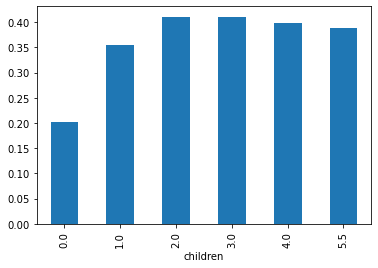

In [49]:
dta.groupby("children")["affairs"].mean().plot(kind="bar")

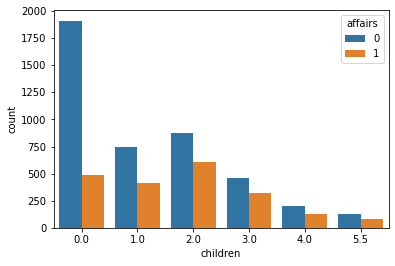

In [47]:
sns.countplot(x="children",data=dta,hue="affairs")

In [50]:
dta["religious"].value_counts()

3.0    2418
2.0    2263
1.0    1013
4.0     656
Name: religious, dtype: int64

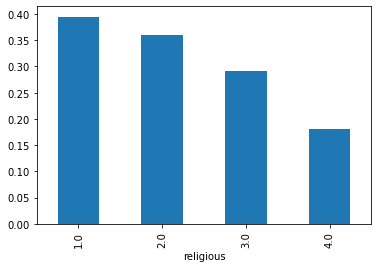

In [53]:
dta.groupby("religious")["affairs"].mean().plot(kind="bar")

In [61]:
dta[(dta["religious"]==4) & (dta["affairs"]==1)].index

Int64Index([  17,   23,   33,   50,   69,   78,  135,  151,  162,  171,
            ...
            1824, 1827, 1846, 1893, 1947, 1991, 1994, 2001, 2036, 2042],
           dtype='int64', length=119)

In [60]:
## We can treat this values are outliers

In [62]:
dta.loc[(dta["religious"]==4) & (dta["affairs"]==1),"religious"]=dta[dta['affairs']==1]["religious"].mode()[0]

In [63]:
dta[(dta["religious"]==4) & (dta["affairs"]==1)]

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs


In [69]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,4.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [70]:
dta.educ.value_counts()

14.0    2271
12.0    2077
16.0    1115
17.0     509
20.0     330
9.0       48
Name: educ, dtype: int64

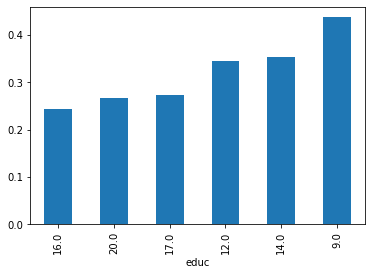

In [74]:
dta.groupby("educ")["affairs"].mean().sort_values().plot(kind="bar")

In [75]:
dta.groupby("affairs")["educ"].describe()

,count,mean,std,min,25%,50%,75%,max
affairs,,,,,,,,
0,4313.0,14.322977,2.211409,9.0,12.0,14.0,16.0,20.0
1,2037.0,13.975454,2.089685,9.0,12.0,14.0,14.0,20.0


In [76]:
dta.occupation.value_counts()

3.0    2775
4.0    1830
2.0     858
5.0     737
6.0     109
1.0      41
Name: occupation, dtype: int64

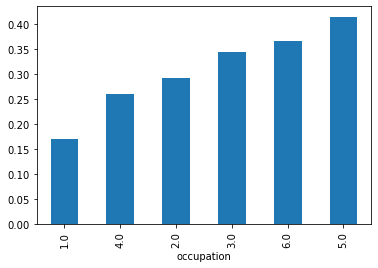

In [77]:
dta.groupby("occupation")["affairs"].mean().sort_values().plot(kind="bar")

In [78]:
# It can be seen that highest occuoation women are having an affair

In [80]:
dta.occupation_husb.value_counts()

4.0    2024
5.0    1776
2.0    1304
6.0     528
3.0     489
1.0     229
Name: occupation_husb, dtype: int64

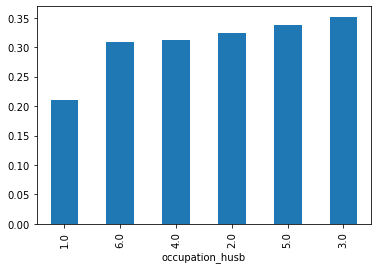

In [81]:
dta.groupby("occupation_husb")["affairs"].mean().sort_values().plot(kind="bar")

In [82]:
#Now  Model Building

In [84]:
X=dta.iloc[:,:-1]
y=dta.iloc[:,-1]

In [85]:
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.3,stratify=y)

In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
sc=StandardScaler()

In [89]:
train_X=sc.fit_transform(train_X)
test_X=sc.transform(test_X)

In [90]:
lr=LogisticRegression()

In [91]:
lr.fit(train_X,train_y)

LogisticRegression()

In [92]:
pred=lr.predict(test_X)

In [93]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [94]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81      1294
           1       0.61      0.43      0.50       611

    accuracy                           0.73      1905
   macro avg       0.69      0.65      0.66      1905
weighted avg       0.71      0.73      0.71      1905



In [95]:
confusion_matrix(test_y,pred)

array([[1125,  169],
       [ 348,  263]], dtype=int64)

In [141]:
grid_params={"C":[0.01,0.001,1,10,100,0.0001],
             "penalty":['l1', 'l2', 'elasticnet'],
}

In [142]:
from sklearn.model_selection import GridSearchCV

In [143]:
grid_search=GridSearchCV(LogisticRegression(n_jobs=-1),param_grid=grid_params,cv=5,n_jobs=-1,verbose=2,scoring="f1")

In [144]:
grid_search.fit(train_X,train_y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    6.7s finished


GridSearchCV(cv=5, estimator=LogisticRegression(n_jobs=-1), n_jobs=-1,
             param_grid={'C': [0.01, 0.001, 1, 10, 100, 0.0001],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='f1', verbose=2)

In [145]:
grid_search.best_score_

0.5412257403449974

In [146]:
grid_search.best_estimator_

LogisticRegression(C=100, n_jobs=-1)

In [147]:
lr_classifier=LogisticRegression(C=100, n_jobs=-1)

In [148]:
lr_classifier.fit(train_X,train_y)

LogisticRegression(C=100, n_jobs=-1)

In [151]:
pred=lr_classifier.predict(test_X)

In [152]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81      1294
           1       0.61      0.43      0.50       611

    accuracy                           0.73      1905
   macro avg       0.69      0.65      0.66      1905
weighted avg       0.71      0.73      0.71      1905

